<a href="https://colab.research.google.com/github/amirmohammadkalateh/pooling-LAYER/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Model architecture saved to cnn_model.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


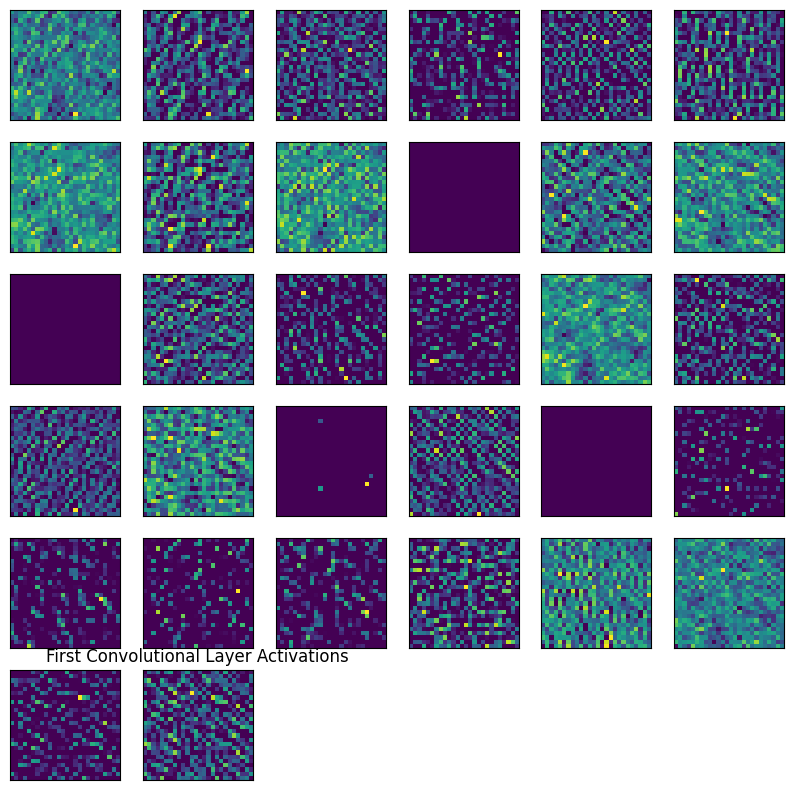

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

# Define the CNN model using the Functional API
input_tensor = tf.keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu')(input_tensor)
conv1_output = x
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
conv2_output = x
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

model.summary()

plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
print("Model architecture saved to cnn_model.png")


dummy_input = np.random.rand(1, 28, 28, 1)


activation_model = models.Model(inputs=model.input, outputs=conv1_output)
activations = activation_model.predict(dummy_input)

# Visualize activations of the first convolutional layer
first_layer_activation = activations
plt.figure(figsize=(10, 10))
for i in range(32):
    plt.subplot(6, 6, i + 1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.xticks([])
    plt.yticks([])
plt.title('First Convolutional Layer Activations')
plt.show()

